In [1]:
#import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read data from file
kc_house_data_df = pd.read_csv('data/kc_house_data.csv')

### Data

- Mostly int and float.
- waterfront, yr_renovated have missing vales
- We won't need some columns

In [3]:
kc_house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
kc_house_data_df.drop(['date','view','zipcode','lat','long','sqft_living15','sqft_lot15', 'waterfront'], axis=1, inplace=True)

- bedroom - 33 rooms doesn't seem right, find highest and remove outliers
- tallest house 3.5
- condition 1-5
- grade 3-13
- yr build 1900 - 2015

In [5]:
kc_house_data_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,yr_renovated
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1970.999676,83.636778
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,29.375234,399.946414
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,1900.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,2015.000000


In [6]:
kc_house_data_df.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,NaN
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,3,11,3890,1530.0,2001,0.0
6,1321400060,257500.0,3,2.25,1715,6819,2.0,3,7,1715,?,1995,0.0
7,2008000270,291850.0,3,1.50,1060,9711,1.0,3,7,1060,0.0,1963,0.0
8,2414600126,229500.0,3,1.00,1780,7470,1.0,3,7,1050,730.0,1960,0.0
9,3793500160,323000.0,3,2.50,1890,6560,2.0,3,7,1890,0.0,2003,0.0


### Continuous data
- Positively skewed
- price is what we want to predict
- size of house and land should be important to predict house price
- separating basement size and the rest of the house might not be too useful 
- sqft_basement needs cleaning


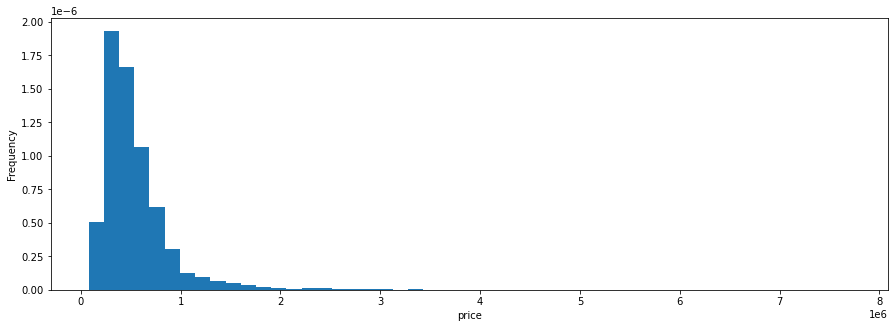

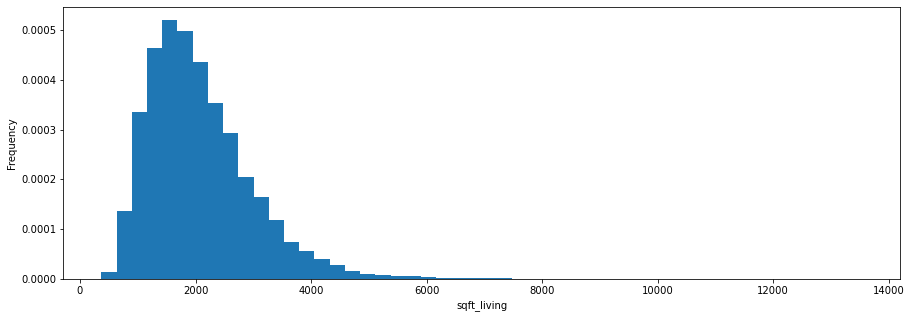

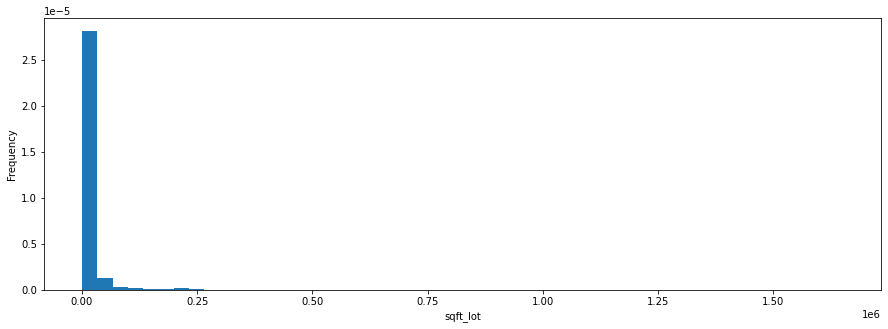

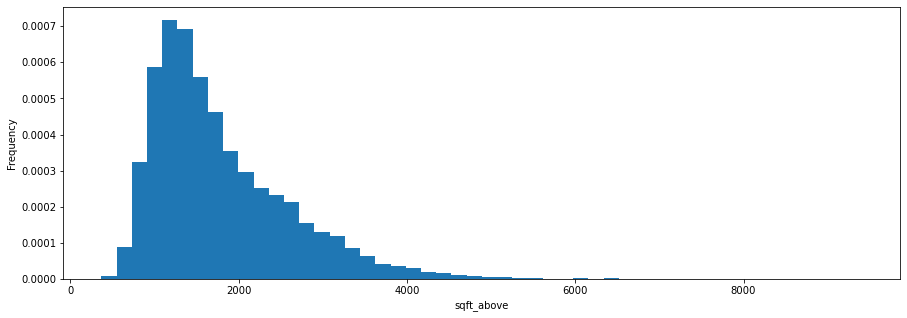

In [7]:
continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_above']

for cont in continuous:
    plt.figure(figsize=(15,5))
    kc_house_data_df[cont].plot.hist(bins=50, density=True)
    plt.xlabel(cont)
    plt.show()  

### Categorical Data
- yr_renovated would be better as yes or no

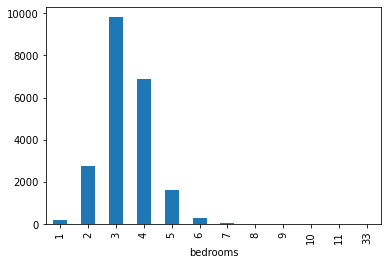

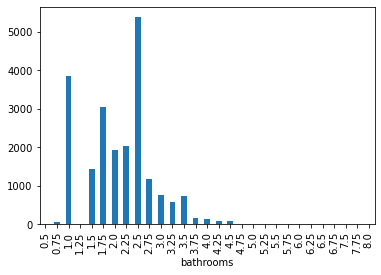

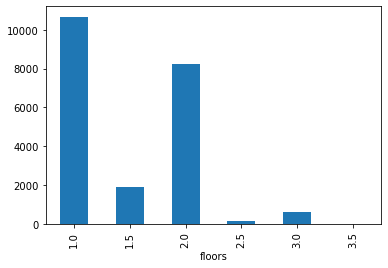

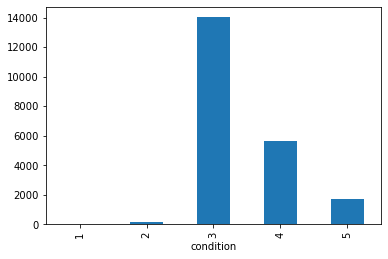

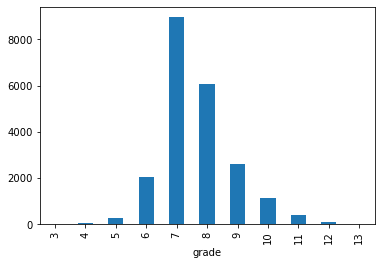

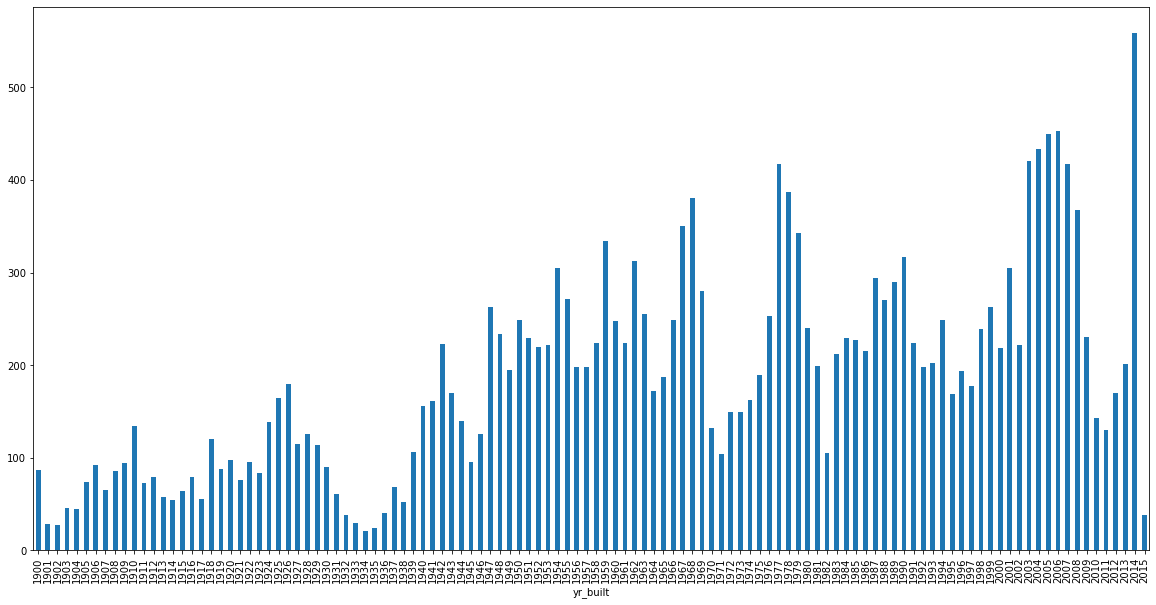

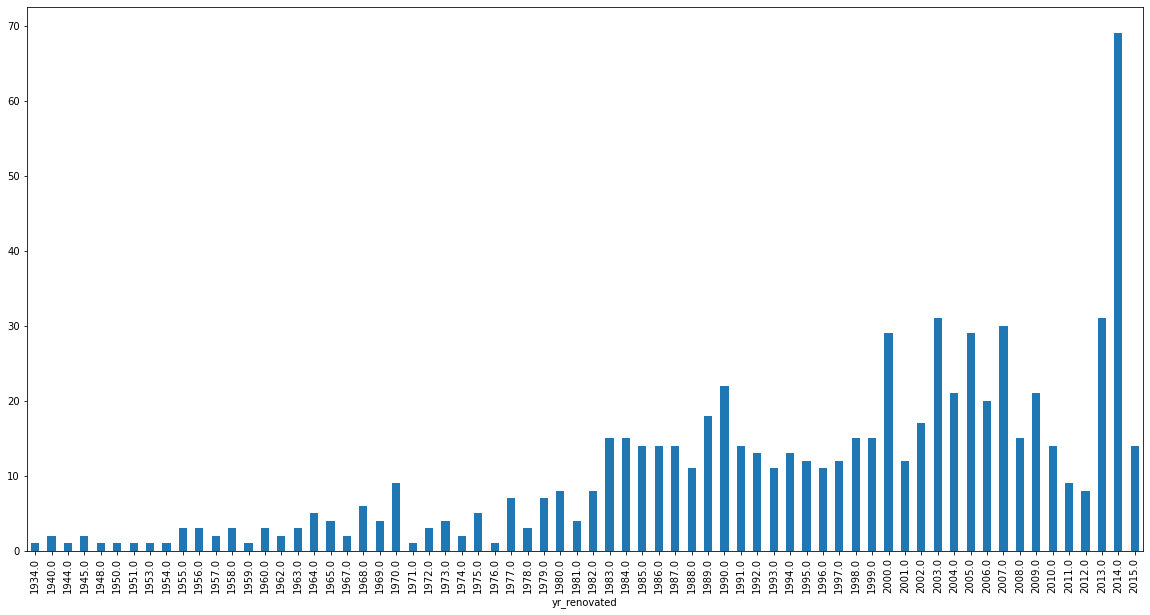

In [44]:
categorical = ['bedrooms', 'bathrooms', 'floors','condition', 'grade','yr_built']


for cat in categorical:
    if cat == 'yr_built':
        plt.figure(figsize=(20,10))
    kc_house_data_df.groupby([cat])[cat].count().plot.bar()  
    plt.show()

#better view of when properties were renovated    
plt.figure(figsize=(20,10))  
yr_reno = clean_house_data_df.loc[clean_house_data_df['yr_renovated'] > 0]
yr_reno.groupby(yr_reno['yr_renovated'])['yr_renovated'].count().plot.bar()
plt.show()

### Cleaning
- remove rows with null yr_renovated as it could cause model to be less accurate
- fix sqft_basement to float
- remove property with 33 bedrooms

In [84]:
clean_house_data_df = kc_house_data_df.dropna(subset=['yr_renovated'])
clean_house_data_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17755 non-null  int64  
 1   price          17755 non-null  float64
 2   bedrooms       17755 non-null  int64  
 3   bathrooms      17755 non-null  float64
 4   sqft_living    17755 non-null  int64  
 5   sqft_lot       17755 non-null  int64  
 6   floors         17755 non-null  float64
 7   condition      17755 non-null  int64  
 8   grade          17755 non-null  int64  
 9   sqft_above     17755 non-null  int64  
 10  sqft_basement  17755 non-null  object 
 11  yr_built       17755 non-null  int64  
 12  yr_renovated   17755 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.9+ MB


In [85]:
pd.options.mode.chained_assignment = None

clean_house_data_df['sqft_basement'] = pd.to_numeric(clean_house_data_df['sqft_basement'], errors = 'coerce')
clean_house_data_df.dropna(subset=['sqft_basement'], inplace=True)
clean_house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17389 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17389 non-null  int64  
 1   price          17389 non-null  float64
 2   bedrooms       17389 non-null  int64  
 3   bathrooms      17389 non-null  float64
 4   sqft_living    17389 non-null  int64  
 5   sqft_lot       17389 non-null  int64  
 6   floors         17389 non-null  float64
 7   condition      17389 non-null  int64  
 8   grade          17389 non-null  int64  
 9   sqft_above     17389 non-null  int64  
 10  sqft_basement  17389 non-null  float64
 11  yr_built       17389 non-null  int64  
 12  yr_renovated   17389 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 1.9 MB


In [86]:
clean_house_data_df.loc[(clean_house_data_df['bedrooms'] >= 10)].sort_values(by=['bedrooms'])
clean_house_data_df.drop(labels=15856, axis=0, inplace=True)

In [87]:
#change to property been renovated or not
clean_house_data_df.loc[(clean_house_data_df['yr_renovated'] > 0), 'yr_renovated'] = 1
clean_house_data_df.rename(columns={'yr_renovated':'renovated'}, inplace=True)

### Check for Multicollinearity
- We have found some predictors that are corellated and have kept sqft_living

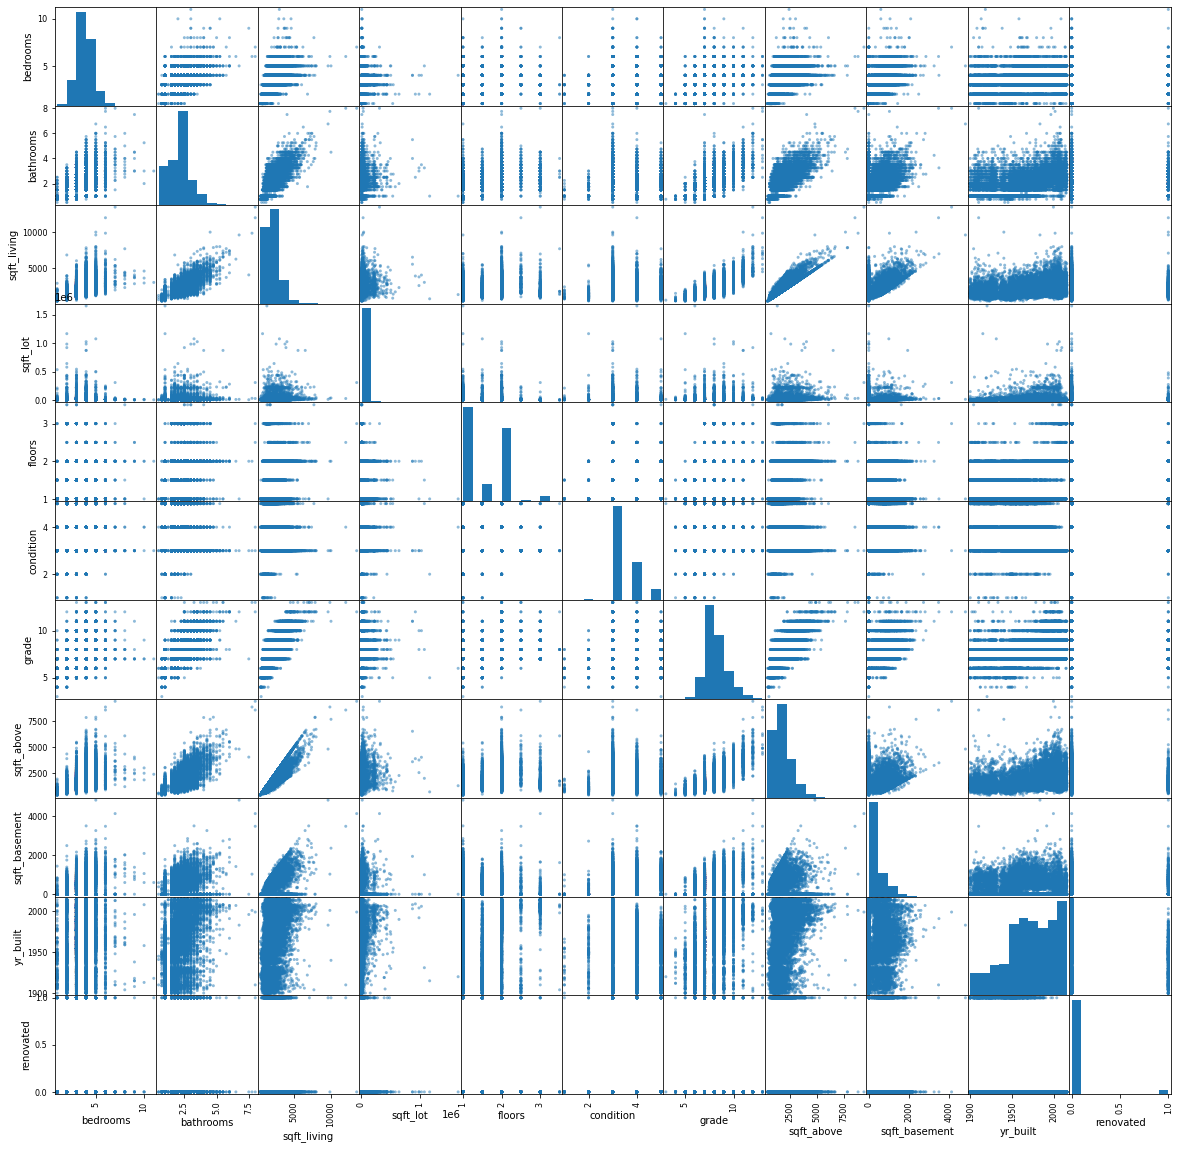

In [88]:
house_pred = clean_house_data_df.iloc[:,2:14]
pd.plotting.scatter_matrix(house_pred, figsize  = [20, 20]);
plt.show()

In [89]:
house_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,renovated
bedrooms,1.000000,0.527457,0.592664,0.031053,0.185320,0.017068,0.366044,0.491095,0.310868,0.160033,0.019734
bathrooms,0.527457,1.000000,0.753504,0.085354,0.503906,-0.131313,0.665489,0.685983,0.280347,0.506510,0.051249
sqft_living,0.592664,0.753504,1.000000,0.167745,0.356532,-0.066163,0.764592,0.875885,0.436399,0.317275,0.054029
sqft_lot,0.031053,0.085354,0.167745,1.000000,-0.008833,-0.011021,0.108905,0.175682,0.019582,0.048982,0.003594
floors,0.185320,0.503906,0.356532,-0.008833,1.000000,-0.263477,0.460728,0.527141,-0.245058,0.487741,0.003153
condition,0.017068,-0.131313,-0.066163,-0.011021,-0.263477,1.000000,-0.151378,-0.161946,0.165047,-0.366227,-0.061755
grade,0.366044,0.665489,0.764592,0.108905,0.460728,-0.151378,1.000000,0.758232,0.168573,0.445345,0.016509
sqft_above,0.491095,0.685983,0.875885,0.175682,0.527141,-0.161946,0.758232,1.000000,-0.051913,0.423126,0.020692
sqft_basement,0.310868,0.280347,0.436399,0.019582,-0.245058,0.165047,0.168573,-0.051913,1.000000,-0.132352,0.073239
yr_built,0.160033,0.506510,0.317275,0.048982,0.487741,-0.366227,0.445345,0.423126,-0.132352,1.000000,-0.222935


In [90]:
df=house_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

# drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>0.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.875885
"(sqft_living, grade)",0.764592
"(sqft_above, grade)",0.758232
"(bathrooms, sqft_living)",0.753504


In [91]:
clean_house_data_df.drop(['sqft_above', 'grade', 'bathrooms'], axis=1, inplace=True)
house_pred = clean_house_data_df.iloc[:,2:10]
abs(house_pred.corr()) > 0.75

,id,price,bedrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,renovated
0,7129300520,221900.0,3,1180,5650,1.0,3,0.0,1955,0.0
1,6414100192,538000.0,3,2570,7242,2.0,3,400.0,1951,1.0
3,2487200875,604000.0,4,1960,5000,1.0,5,910.0,1965,0.0
4,1954400510,510000.0,3,1680,8080,1.0,3,0.0,1987,0.0
5,7237550310,1230000.0,4,5420,101930,1.0,3,1530.0,2001,0.0
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,1530,1131,3.0,3,0.0,2009,0.0
21593,6600060120,400000.0,4,2310,5813,2.0,3,0.0,2014,0.0
21594,1523300141,402101.0,2,1020,1350,2.0,3,0.0,2009,0.0
21595,291310100,400000.0,3,1600,2388,2.0,3,0.0,2004,0.0












Doing some testing



v
v
v
v
v
v

17389
366


























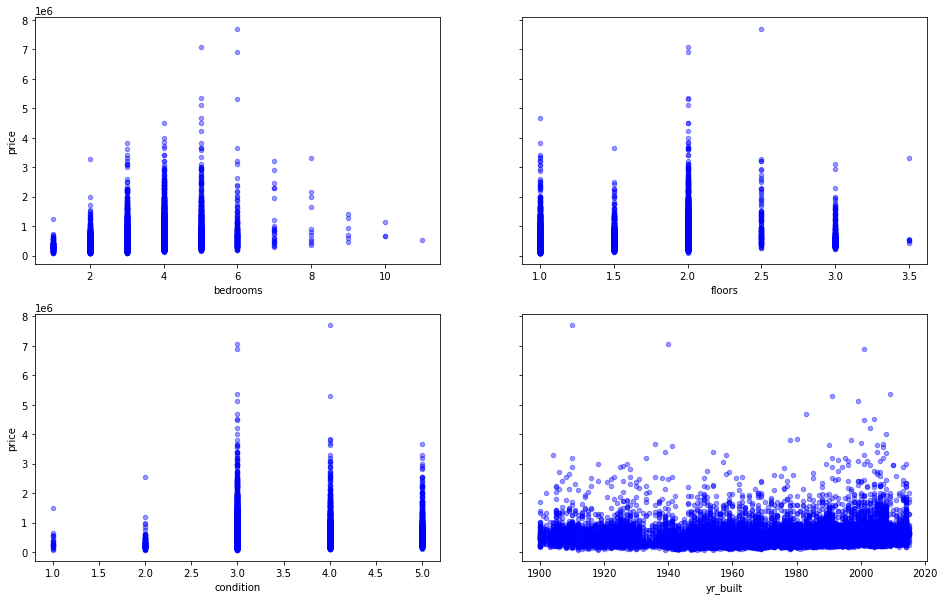

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharey=True)
categorical = ['bedrooms', 'floors','condition','yr_built', 'renovated']
for xcol, ax in zip(categorical, axes.flatten()):
    clean_house_data_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

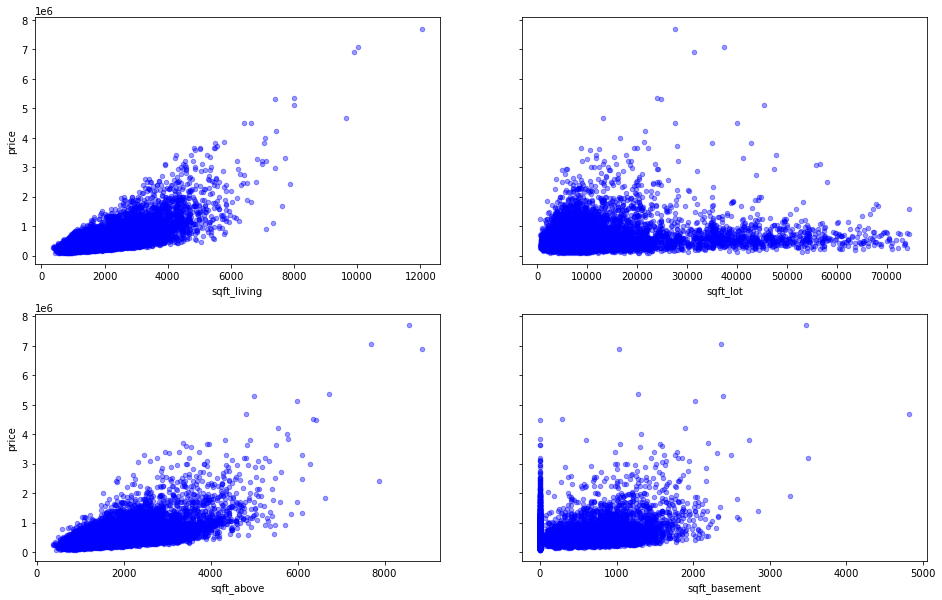

In [61]:
#remove sqft_lot over 75000 to get a better picture of the data
sqft_lot = clean_house_data_df.loc[clean_house_data_df['sqft_lot'] < 75000]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharey=True)
noncatagorical = ['sqft_living', 'sqft_lot', 'sqft_basement']
for xcol, ax in zip(noncatagorical, axes.flatten()):
    sqft_lot.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

